In [41]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set()

In [2]:
image_size = 80
channels = 3
epochs = 100
batch_size = 32

In [8]:
dataset = keras.preprocessing.image_dataset_from_directory(
    'Vegetable Images',
    image_size = (image_size, image_size),
    batch_size = batch_size,
    shuffle = True,
)

Found 21000 files belonging to 15 classes.


In [13]:
class_names = dataset.class_names

In [14]:
class_names

['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

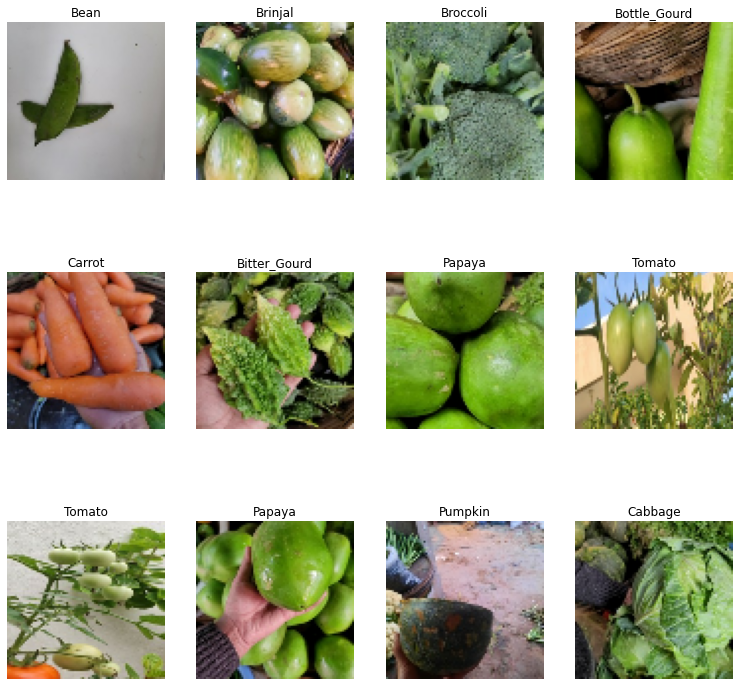

In [17]:
plt.figure(figsize = (13, 13))
for images, labels in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i].numpy()])
        plt.axis('off')

In [19]:
print('Number of batch images in the dataset:', len(dataset))
print('Number of classes in the dataset:', len(class_names))

Number of batch images in the dataset: 657
Number of classes in the dataset: 15


In [20]:
def data_splitting(data):
    train_size = int(len(data) * 0.8)
    test_size = int(len(data) * 0.1)
    validation_size = int(len(data) * 0.1)
    train_data = data.take(train_size)
    test_data = data.skip(train_size).take(test_size)
    validation_data = data.skip(train_size + test_size).take(validation_size)
    return train_data, test_data, validation_data

In [21]:
train_data, test_data, validation_data = data_splitting(dataset)

In [22]:
print('Number of batches in train data:', len(train_data))
print('Number of batches in test data:', len(test_data))
print('Number of batches in validation data:', len(validation_data))

Number of batches in train data: 525
Number of batches in test data: 65
Number of batches in validation data: 65


In [23]:
def image_scalling(data):
    data = data.map(lambda x, y: (x / 255, y))
    return data

In [24]:
train_data_scaled = image_scalling(train_data)

In [27]:
test_data_scaled = image_scalling(test_data)

In [28]:
validation_data_scaled = image_scalling(validation_data)

In [37]:
i = Input(shape = (image_size, image_size, channels))
x = Conv2D(64, (3, 3), padding = 'same', activation = 'relu')(i)
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Conv2D(32, (3, 3), padding = 'same', activation = 'relu')(x)
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Conv2D(32, (3, 3), padding = 'same', activation = 'relu')(x)
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Flatten()(x)
x = Dense(64, activation = 'relu')(x)
x = Dense(len(class_names), activation = 'softmax')(x)
model = Model(inputs = i, outputs = x)

In [38]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [39]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 2)

In [40]:
history = model.fit(train_data_scaled, epochs = epochs, validation_data = validation_data_scaled, verbose = 1,
                   batch_size = batch_size, callbacks = [early_stopping])

Epoch 1/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 108s 204ms/step - accuracy: 0.4065 - loss: 1.7804 - val_accuracy: 0.8188 - val_loss: 0.5941
Epoch 2/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 108s 205ms/step - accuracy: 0.8228 - loss: 0.5589 - val_accuracy: 0.8582 - val_loss: 0.4611
Epoch 3/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 110s 209ms/step - accuracy: 0.9011 - loss: 0.3194 - val_accuracy: 0.9082 - val_loss: 0.3055
Epoch 4/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 109s 208ms/step - accuracy: 0.9359 - loss: 0.2112 - val_accuracy: 0.9389 - val_loss: 0.1982
Epoch 5/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 110s 209ms/step - accuracy: 0.9524 - loss: 0.1463 - val_accuracy: 0.9524 - val_loss: 0.1718
Epoch 6/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 109s 207ms/step - accuracy: 0.9687 - loss: 0.0923 - val_accuracy: 0.8952 - val_loss: 0.3732
Epoch 7/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 110s 208ms/step - accuracy: 0.9676 - loss: 0.1026 - val_accuracy: 0.9466 - val_loss: 0.1918


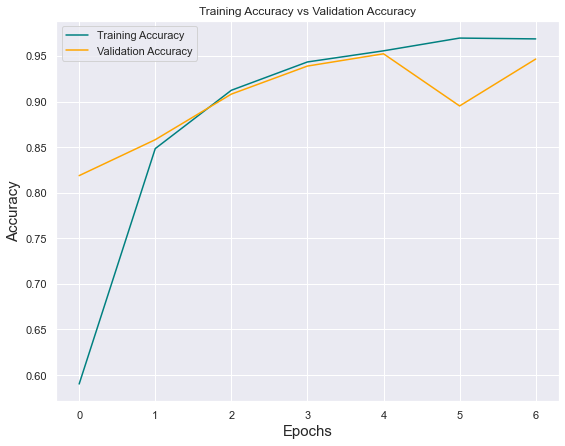

In [42]:
plt.figure(figsize = (9, 7))
plt.plot(history.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.legend()
plt.show()

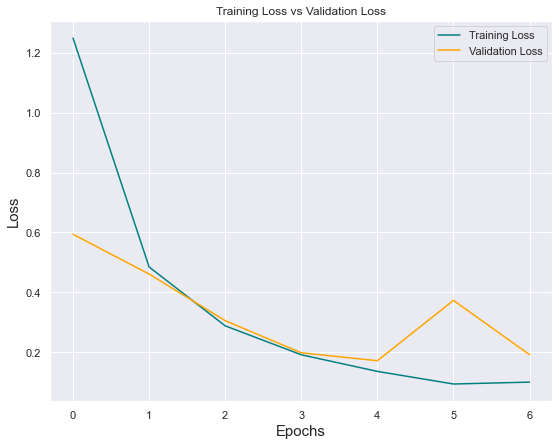

In [43]:
plt.figure(figsize = (9, 7))
plt.plot(history.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.legend()
plt.show()

In [44]:
model.evaluate(test_data_scaled)

65/65 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - accuracy: 0.9565 - loss: 0.1465


[0.18509447574615479, 0.9495192170143127]